In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit, describe
import numpy as np

In [3]:
hist_sig = np.asarray([1,2,3,4])
hist_bkg = np.asarray([5,5,5,5])

In [4]:
m = HistiModel('model')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)

In [5]:
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [6]:
print describe(background.pdf)

['x', 'BackgroundNorm']


In [7]:
print background.bincontent
assess = []
for i in range(len(background.binedges)):
    assess.append(background.pdf(i,1))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0, 0.0]


In [8]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

In [9]:
data = hist_sig*2 +hist_bkg

chan.SetData(data)
m.AddChannel(chan)

In [10]:
blh = BinnedLH(m, bound=(0,4))

In [11]:
params = m.Parameters()
print "params are ",params
print describe(m.pdf)

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'limit_BackgroundNorm': (0, 100), 'errordef': 1}
['x', 'SigXSecOverSM', 'BackgroundNorm']


In [12]:
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


In [13]:
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

FCN = 7.26387865589 
 TOTAL NCALL = 43 
 NCALLS = 43 
 
 
 EDM = 2.93583670878e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39966,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.979534,0,0,0.0,100.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39931,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.978879,0,0,0.0,100.0,


+,SigXSecOverSM,BackgroundNorm
SigXSecOverSM,1.00,-0.90
BackgroundNorm,-0.90,1.00


Error,-1.98618852268,1.00009089428
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


Error,-0.756705600149,1.08484147103
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0848414710272252, 'lower': -0.756705600148597, 'at_lower_limit': False, 'min': 1.000028393191904, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 82},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 1.0000908942838587, 'lower': -1.9861885226766014, 'at_lower_limit': False, 'min': 1.9999091057161413, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 52}}

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/iminuit/_plotting.py:51: RuntimeWarning: band and text is requested but the bound is too narrow.
  warnings.warn(RuntimeWarning('band and text is requested but'


(array([-2.79871089, -2.70176907, -2.60482725, -2.50788544, -2.41094362,
        -2.3140018 , -2.21705998, -2.12011816, -2.02317635, -1.92623453,
        -1.82929271, -1.73235089, -1.63540907, -1.53846726, -1.44152544,
        -1.34458362, -1.2476418 , -1.15069998, -1.05375816, -0.95681635,
        -0.85987453, -0.76293271, -0.66599089, -0.56904907, -0.47210726,
        -0.37516544, -0.27822362, -0.1812818 , -0.08433998,  0.01260183,
         0.10954365,  0.20648547,  0.30342729,  0.40036911,  0.49731092,
         0.59425274,  0.69119456,  0.78813638,  0.8850782 ,  0.98202002,
         1.07896183,  1.17590365,  1.27284547,  1.36978729,  1.46672911,
         1.56367092,  1.66061274,  1.75755456,  1.85449638,  1.9514382 ,
         2.04838001,  2.14532183,  2.24226365,  2.33920547,  2.43614729,
         2.53308911,  2.63003092,  2.72697274,  2.82391456,  2.92085638,
         3.0177982 ,  3.11474001,  3.21168183,  3.30862365,  3.40556547,
         3.50250729,  3.5994491 ,  3.69639092,  3.7

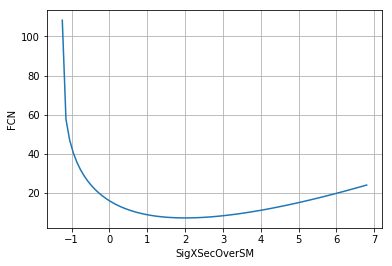

In [14]:
%matplotlib inline
minimiser.draw_profile('SigXSecOverSM')

# Testing Combined Pdf

In [15]:
from histimator.pdfs import HistiCombPdf

In [16]:
new_background = HistiSample('background')
new_background.SetHisto((np.asarray([50,75]), np.asarray([100,120,150])))
new_background.AddNorm("BackgroundNorm",1.,0,100)

In [17]:
new_chan = HistiChannel("CR")
new_chan.AddSample(new_background)
new_chan.SetData([53,72])

In [18]:
m5 = HistiModel("final model")
m5.AddChannel(chan)
m5.AddChannel(new_chan)
print m5.data

[   7    9   11   13 1060 2160]


In [19]:
blh = BinnedLH(m5)
params = m5.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'limit_BackgroundNorm': (0, 100), 'errordef': 1}


In [20]:
describe(blh)

['SigXSecOverSM', 'BackgroundNorm']

In [21]:
blh = BinnedLH(m5)
describe(blh)

['SigXSecOverSM', 'BackgroundNorm']

In [22]:
print describe(m5.pdf)
m5.pdf.evaluatePdf(1,1)
print 'data is', m5.data, 'model is', m5.pdf.evaluatePdf(1,1)

['x', 'SigXSecOverSM', 'BackgroundNorm']
data is [   7    9   11   13 1060 2160] model is [    6.     7.     8.     9.  1000.  2250.]


In [23]:
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


In [24]:
minimiser.migrad()

FCN = 19.8745501026 
 TOTAL NCALL = 38 
 NCALLS = 38 
 
 
 EDM = 2.54980920299e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.01621,0.817604,0,0,0.0,3.0,
2,BackgroundNorm,0.990783,0.0246846,0,0,0.0,100.0,


({'hesse_failed': False, 'has_reached_call_limit': False, 'has_accurate_covar': True, 'has_posdef_covar': True, 'up': 1.0, 'edm': 2.5498092029850386e-07, 'is_valid': True, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 19.87455010262169, 'nfcn': 38},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 2.016213838449753, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.8176035279738597, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNorm', 'has_limits': True, 'value': 0.9907834321629283, 'number': 1, 'has_lower_limit': True, 'upper_limit': 100.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.024684589307963356, 'is_fixed': False}])

(array([ 0.38100678,  0.41404127,  0.44707575,  0.48011024,  0.51314473,
         0.54617921,  0.5792137 ,  0.61224818,  0.64528267,  0.67831716,
         0.71135164,  0.74438613,  0.77742061,  0.8104551 ,  0.84348959,
         0.87652407,  0.90955856,  0.94259304,  0.97562753,  1.00866202,
         1.0416965 ,  1.07473099,  1.10776547,  1.14079996,  1.17383445,
         1.20686893,  1.23990342,  1.2729379 ,  1.30597239,  1.33900688,
         1.37204136,  1.40507585,  1.43811033,  1.47114482,  1.50417931,
         1.53721379,  1.57024828,  1.60328276,  1.63631725,  1.66935174,
         1.70238622,  1.73542071,  1.76845519,  1.80148968,  1.83452417,
         1.86755865,  1.90059314,  1.93362762,  1.96666211,  1.9996966 ,
         2.03273108,  2.06576557,  2.09880005,  2.13183454,  2.16486903,
         2.19790351,  2.230938  ,  2.26397248,  2.29700697,  2.33004146,
         2.36307594,  2.39611043,  2.42914491,  2.4621794 ,  2.49521389,
         2.52824837,  2.56128286,  2.59431734,  2.6

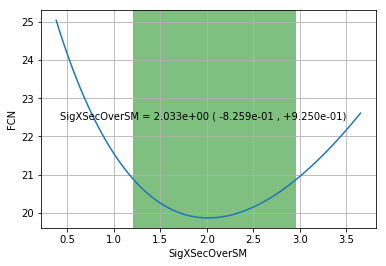

In [25]:
minimiser.draw_profile('SigXSecOverSM')